# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Pridolin Bato
- **Email:** pridolin.bato@ti.ukdw.ac.id
- **ID Dicoding:** PRIDOLIN BATO

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan jumlah penyewaan sepeda pada saat hari kerja dibanding dengan hari libur ?
- Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda ?
- Bagaimana tren terkait jumlah penyewa sepeda dalam dua tahun terakhir?

## Import Semua Library yang Dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Setelah melakukan import packages yang diperlukan, langkah selanjutnya adalah mengumpulkan data. Data yang akan digunakan pada analisis kali ini adalah data Bike Sharing Dataset yang terdiri atas dua jenis yaitu day.csv dan hour.csv.

**Load data day.csv**

In [2]:
read_data_day_df = pd.read_csv("data/day.csv")
read_data_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Load data hour.csv**

In [3]:
read_data_hour_df = pd.read_csv("data/hour.csv")
read_data_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Mengecek tipe data yang terdapat pada kedua data**

In [4]:
read_data_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
read_data_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan kolom pada data, diketahui bahwa terdapat 1 tipe data yang tidak sesuai. Kolom tersebut adalah dteday, dimana perlu kita ubah tipenya menjadi datetime.

**mengecek missing value pada data**

In [6]:
read_data_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
read_data_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Tidak Terdapat Missing Value**

**Memeriksa duplikasi pada data**

In [8]:
print("Jumlah duplikasi pada data day: ", read_data_day_df.duplicated().sum())
print("Jumlah duplikasi pada data hour: ", read_data_hour_df.duplicated().sum())

Jumlah duplikasi pada data day:  0
Jumlah duplikasi pada data hour:  0


Hasil menunjukan angka 0, artinya tidak terdapat duplikasi data.

**Memeriksa apakah terdapat keanehan pada nilai statistiknya melalui kolom numerik data tersebut**

In [9]:
read_data_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
read_data_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Parameter statistik kedua jenis data tidak menunjukan adanya keanehan.

### Cleaning Data

**Menghapus tabel yang tidak diperlukan**

In [11]:
del read_data_hour_df

Tabel hour tidak di perlukan dikarenakan isi pada tabel hour dan day itu perbedaanya hanya di kolom hournya, sisanya sama, selain itu karena tidak relevan dengan pertanyaan bisnis yang di tetapkan

**Menghapus kolom yang tidak digunakan**

In [12]:
drop_col = ['instant', 'windspeed']
for data in read_data_day_df.columns:
  if data in drop_col:
    read_data_day_df.drop(labels=data, axis=1, inplace=True)
read_data_day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


Kolom yang tidak akan digunakan pada analisis kali ini merupakan kolom 'instant', kolom ini tidak akan digunakan karena nilai datanya tidak memberikan informasi yang berguna dan kolom 'windspeed', Tidak ada pertanyaan bisnis yang terkait dengan efek kecepatan angin terhadap jumlah penyewa sepeda.

**Mengubah nama judul kolom**

In [13]:
read_data_day_df.rename(columns={'dteday': 'dateday','yr': 'year','mnth': 'month','weathersit': 'weather_cond','cnt': 'count'}, inplace=True)
read_data_day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


**Mengubah angka menjadi keterangan**

In [14]:
def map_values(data, mapping):
    return {key: mapping(value) for key, value in data.items()}

def month_mapping(value):
    months = {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    }
    return months.get(value, 'Unknown')

def season_mapping(value):
    seasons = {
        1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
    }
    return seasons.get(value, 'Unknown')

def weekday_mapping(value):
    weekdays = {
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    }
    return weekdays.get(value, 'Unknown')

def weather_cond_mapping(value):
    conditions = {
        1: 'Clear/Partly Cloudy',
        2: 'Misty/Cloudy',
        3: 'Light Snow/Rain',
        4: 'Severe Weather'
    }
    return conditions.get(value, 'Unknown')

read_data_day_df['month'] = map_values(read_data_day_df['month'], month_mapping)
read_data_day_df['season'] = map_values(read_data_day_df['season'], season_mapping)
read_data_day_df['weekday'] = map_values(read_data_day_df['weekday'], weekday_mapping)
read_data_day_df['weather_cond'] = map_values(read_data_day_df['weather_cond'], weather_cond_mapping)


**Mengubah tipe data ke datetime**

In [15]:
read_data_day_df['dateday'] = pd.to_datetime(read_data_day_df.dateday)

**Mengubah tipe data ke categorical**

In [16]:
cols_to_convert = ['season', 'month', 'holiday', 'weekday', 'workingday', 'weather_cond']
for col in cols_to_convert:
  read_data_day_df[col] = read_data_day_df[col].astype('category')


Penggunaan tipe data kategori untuk mengoptimalkan kinerja dan penggunaan memori

In [17]:
read_data_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    int64         
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 51.4 KB


## Exploratory Data Analysis (EDA)

**Mengelompokkan penyewa sepeda berdasarkan bulan**

In [18]:
read_data_day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\user\AppData\Local\Temp\ipykernel_9168\2499638944.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  read_data_day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

**Mengelompokkan penyewa sepeda berdasarkan keadaan cuaca**

In [19]:
read_data_day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\user\AppData\Local\Temp\ipykernel_9168\1365589545.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  read_data_day_df.groupby(by='weather_cond').agg({


count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

**Mengelompokkan penyewa sepeda berdasarkan holiday**

In [20]:
read_data_day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\user\AppData\Local\Temp\ipykernel_9168\4164115492.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  read_data_day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

**Membandingkan penyewa sepeda pada saat hari kerja dan akhir pekan**

In [21]:
read_data_day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

C:\Users\user\AppData\Local\Temp\ipykernel_9168\1308537231.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  read_data_day_df.groupby(by='weekday').agg({


count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

**Mengelompokkan penyewa sepeda berdasarkan workingday**

In [22]:
read_data_day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

C:\Users\user\AppData\Local\Temp\ipykernel_9168\722606171.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  read_data_day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

**Mengelompokkan penyewa sepeda berdasarkan season**

In [23]:
read_data_day_df.groupby(by='season').agg({'casual': 'mean','registered': 'mean','count': ['max', 'min', 'mean']})

C:\Users\user\AppData\Local\Temp\ipykernel_9168\2877843052.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  read_data_day_df.groupby(by='season').agg({'casual': 'mean','registered': 'mean','count': ['max', 'min', 'mean']})


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

## Visualization & Explanatory Analysis

### Pertanyaan : Bagaimana perbedaan jumlah penyewaan sepeda pada saat hari kerja dibanding dengan hari libur ?

C:\Users\user\AppData\Local\Temp\ipykernel_9168\2575195033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_9168\2575195033.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


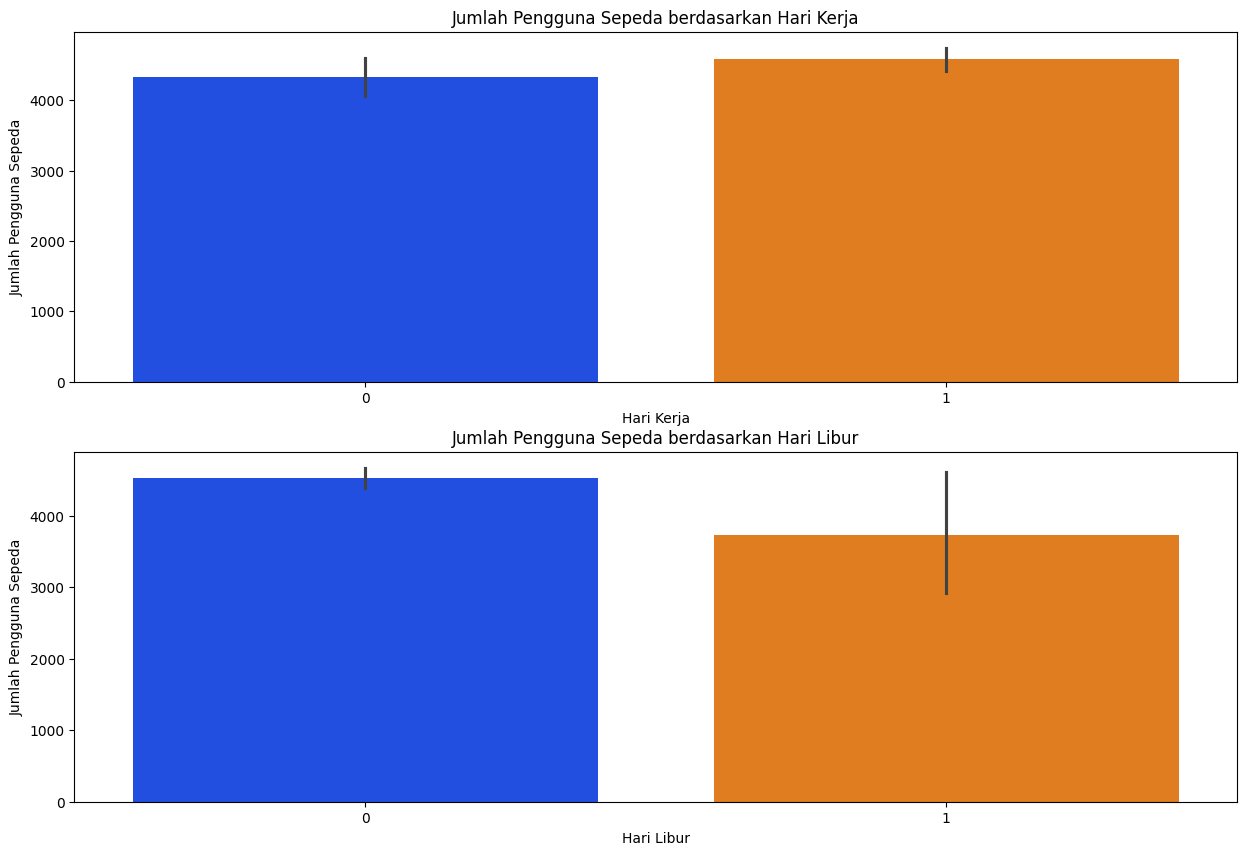

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

sns.barplot(
    x='workingday',
    y='count',
    data=read_data_day_df,
    ax=axes[0],
    palette="bright")
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

sns.barplot(
  x='holiday',
  y='count',
  data=read_data_day_df,
  ax=axes[1],
  palette="bright")
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout
plt.show()

Berdasarkan visualisasi data pada barplot diatas, bisa ditarik kesimpulan sebagai berikut:
- Jumlah penyewa sepeda lebih banyak pada hari kerja (yakni senin - jumat) daripada hari libur di akhir pekan (yakni sabtu dan minggu). biru menandakan akhir pekan dan orange menandakan hari kerja.
- Jumlah penyewa sepeda jauh lebih banyak pada hari biasa (bukan hari libur) dibandingkan hari libur (nasional).

### Pertanyaan : Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda ?

C:\Users\user\AppData\Local\Temp\ipykernel_9168\694559002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


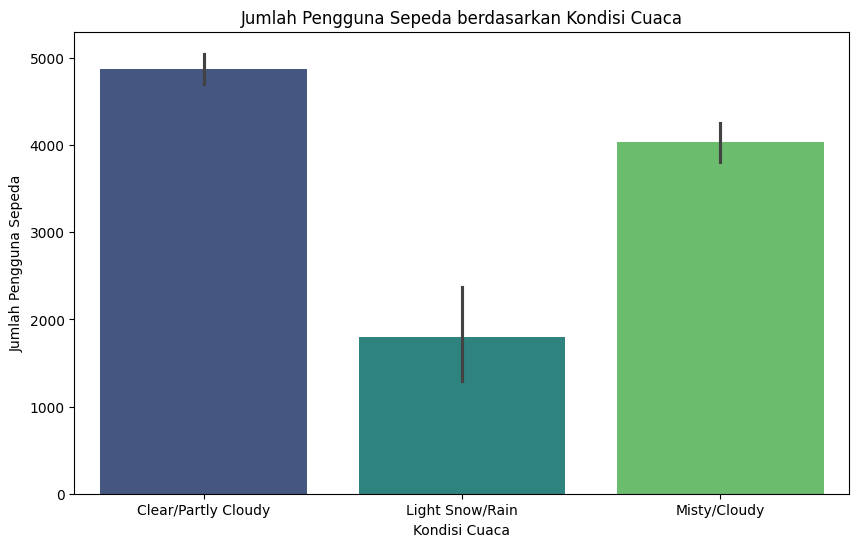

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=read_data_day_df,
    palette="viridis"
)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


Berdasarkan visualisasi data menggunakan boxplot, dapat disimpulkan bahwa jelas terdapat hubungan antara kondisi cuaca dan penyewa sepeda. Kondisi cuaca saat cerah(Clear) menjadi kondisi yang paling diminati, kemudian diikuti dengan cuaca mendung(Misty) , dan terakhir ketika cuaca sedang sedikit bersalju/hujan(Light Snow/Rain) menjadi yang paling sedikit diminati.

### Pertanyaan : Bagaimana tren terkait jumlah penyewa sepeda dalam dua tahun terakhir?

C:\Users\user\AppData\Local\Temp\ipykernel_9168\1702744640.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = read_data_day_df.groupby(by=["month", "year"]).agg({


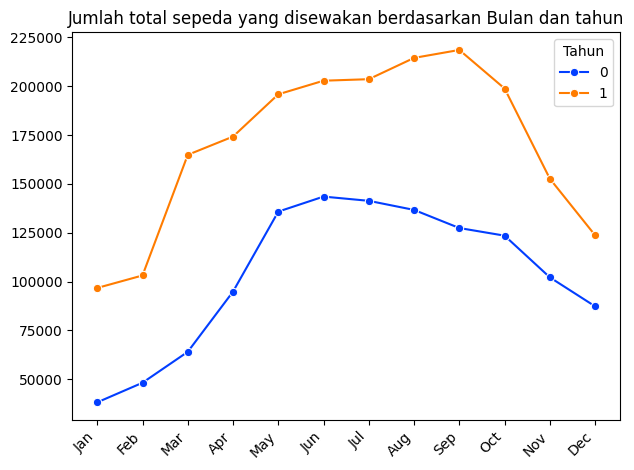

In [26]:
read_data_day_df['month'] = pd.Categorical(read_data_day_df['month'], categories=
                                           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                                           ordered=True)

monthly_counts = read_data_day_df.groupby(by=["month", "year"]).agg({
                                          "count": "sum"
                                      }).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="bright",
    marker="o"
)

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")

month_positions = monthly_counts['month'].unique()

plt.xticks(month_positions, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           rotation=45, ha="right")

plt.tight_layout()
plt.show()


Tren terkait jumlah penyewaan sepeda yang terjadi biasanya dimulai dari jumlah yang rendah di setiap awal tahun, kemudian mulai meningkat di pertengahan tahun, dan kemudian menurun menjelang akhir tahun. Dapat dilihat bahwa puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi terjadi pada bulan Januari. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan Juni dan memiliki penyewaan tersepi pada bulan Januari. Faktanya, tahun 2012 memiliki jumlah lebih unggul daripada tahun 2011.

## Conclusion

### Pertanyaan : Bagaimana perbedaan jumlah penyewaan sepeda pada saat hari kerja dibanding dengan hari libur ?

Berdasarkan visualisasi data pada barplot diatas, bisa ditarik kesimpulan sebagai berikut:
- Jumlah penyewa sepeda lebih banyak pada hari kerja (yakni senin - jumat) daripada hari libur di akhir pekan (yakni sabtu dan minggu). 0 menandakan akhir pekan dan 1 menandakan hari kerja.
- Jumlah penyewa sepeda jauh lebih banyak pada hari biasa (bukan hari libur) dibandingkan hari libur (nasional).

### Pertanyaan : Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda ?

Berdasarkan visualisasi data menggunakan boxplot, dapat disimpulkan bahwa jelas terdapat hubungan antara kondisi cuaca dan penyewa sepeda. Kondisi cuaca saat cerah menjadi kondisi yang paling diminati, kemudian diikuti dengan cuaca mendung , dan terakhir ketika cuaca sedang sedikit bersalju/hujan menjadi yang paling sedikit diminati.

### Pertanyaan : Bagaimana tren terkait jumlah penyewa sepeda dalam dua tahun terakhir? 

Tren terkait jumlah penyewaan sepeda yang terjadi biasanya dimulai dari jumlah yang rendah di setiap awal tahun, kemudian mulai meningkat di pertengahan tahun, dan kemudian menurun menjelang akhir tahun. Dapat dilihat bahwa puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan September, sementara bulan yang paling sepi terjadi pada bulan Januari. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan Juni dan memiliki penyewaan tersepi pada bulan Januari. Faktanya, tahun 2012 memiliki jumlah lebih unggul daripada tahun 2011.

**Menyimpan berkas data yang telah dibersihkan**

In [27]:
read_data_day_df.to_csv("kumpulan_data.csv", index=False)